In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [24]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

In [26]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

X, y = mnist['data'], mnist['target']

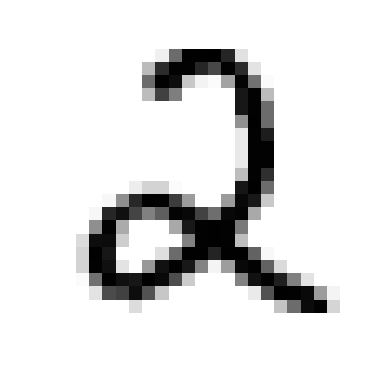

In [32]:
# seeing a random image
def display_image(data):
    """
    
    :param data: 
    :param idx: 
    :return: 
    """
    some_digital_image = data.reshape(28, 28)
    plt.imshow(some_digital_image, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()
    
    return None


random_number = 54325
random_image_data = X.values[random_number]
display_image(random_image_data)

In [7]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = data[:60000], data[60000:], target[:60000], target[60000:]

X_train, X_test = X_train.astype('float32'), X_test.astype('float32')
y_train, y_test = y_train.astype('int'), y_test.astype('int')

X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train = y_train.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
# looking at the complexity of the classification task
number_0 = X_train.values[y_train == 0][:10]
number_1 = X_train.values[y_train == 1][:10]
number_2 = X_train.values[y_train == 2][:10]
number_3 = X_train.values[y_train == 3][:10]
number_4 = X_train.values[y_train == 4][:10]
number_5 = X_train.values[y_train == 5][:10]
number_6 = X_train.values[y_train == 6][:10]
number_7 = X_train.values[y_train == 7][:10]
number_8 = X_train.values[y_train == 8][:10]
number_9 = X_train.values[y_train == 9][:10]

In [86]:
arr_ = np.zeros(shape=(28, 280))
for i in range(10):
    num_ = number_0[i].reshape(28, 28)
    np.append(arr_, num_, axis=1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(-0.5, 279.5, 27.5, -0.5)

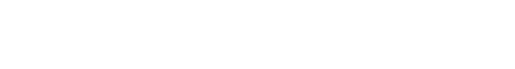

In [85]:
plt.imshow(arr_, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [9]:
# scaling the data

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

StandardScaler()

In [12]:
# Traditional machine learning techniques
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)
y_pred = sgd_clf.predict(X_test_scaled)

print(f'the accuracy from traditional machine learning technique is: {accuracy_score(y_test, y_pred)}')

SGDClassifier(random_state=42)

the accuracy from traditional machine learning technique is: 0.896


In [22]:
# the number of weights trained 
sgd_clf.coef_.shape
sgd_clf.intercept_.shape

(10, 784)

(10,)

In [14]:
# neural network with densely connected layers

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28*28))
x = layers.Dense(512, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(x)
model_dnn = keras.Model(inputs=inputs, outputs=outputs)

model_dnn.compile(optimizer='rmsprop', 
                            loss='sparse_categorical_crossentropy', 
                            metrics=['accuracy'])

model_dnn.fit(X_train_scaled, y_train, epochs=5, batch_size=128)

test_loss, test_acc = model_dnn.evaluate(X_test_scaled, y_test)
print(f'the accuracy from neural network with densely connected layer is: {test_acc:.3f}')

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2139 - accuracy: 0.9399
Epoch 2/5
469/469 [==============================] - 0s 854us/step - loss: 0.0945 - accuracy: 0.9740
Epoch 3/5
469/469 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9826
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0482 - accuracy: 0.9872
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0399 - accuracy: 0.9905


313/313 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9716
the accuracy from traditional machine learning technique is: 0.9715999960899353


In [15]:
model_dnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Convolutional neural network

# convolutional neural network will take only third order tensor as an input
# with height, width and number of channels in the dimensions,
# so we need to reshape the data for convolutional neural network

from tensorflow import keras
from tensorflow.keras import layers

X_train_reshaped = X_train_scaled.reshape((60000, 28, 28, 1))
X_test_reshaped = X_test_scaled.reshape((10000, 28, 28, 1))

inputs = keras.Input(shape=(28, 28, 1)) # CNN only takes 3 dimensional data as input.
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)

model_cnn = keras.Model(inputs=inputs, outputs=outputs)

model_cnn.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model_cnn.fit(X_train_reshaped, y_train, epochs=5, batch_size=64)

test_loss, test_acc = model_cnn.evaluate(X_test_reshaped, y_test)
print(f'the accuracy from convolutional neural network is: {test_acc:.3f}')

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1308 - accuracy: 0.9597
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0398 - accuracy: 0.9877
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0270 - accuracy: 0.9917
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0202 - accuracy: 0.9938
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0153 - accuracy: 0.9952


313/313 [==============================] - 1s 3ms/step - loss: 0.0283 - accuracy: 0.9920
the accuracy from convolutional neural network is: 0.992


In [27]:
model_cnn.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         7385